In [284]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit
from scipy.signal import lfilter


In [285]:
def gauss(x, mu, sigma):
    return np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

In [286]:
def recalibration(x, a=-0.53779, b=716.74418):
    return a * x + b

# Calibration

### Data will be trimmed for ..700 nm to ensure it is safe. That takes \[100:\] for all the data arrays.

In [287]:
data_blue = pd.read_csv('Calibration (bad)/blue.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))[100:]
data_blue['Total'] = (np.sqrt(data_blue['Red'].values) + np.sqrt(data_blue['Green'].values) + np.sqrt(data_blue['Blue'].values)) ** 2 

data_blue['Total'] /= np.max(data_blue['Total'])

n = 3  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_blue['Total_f'] = lfilter(b, a, data_blue['Total'])
data_blue['Total_f'] /= np.max(data_blue['Total_f'])
data_blue.head()

,Red,Green,Blue,Total,Total_f
100,0,0,0,0.0,0.0
101,0,0,0,0.0,0.0
102,0,0,0,0.0,0.0
103,0,0,0,0.0,0.0
104,0,0,0,0.0,0.0


In [288]:
x = recalibration(np.arange(data_blue['Total'].values.size))

In [289]:
BLUE_PEAK = np.argmax(data_blue['Total_f'])
BLUE_WAVE = 450
BLUE_PEAK

496

mu_blue, sigma_blue = curve_fit(gauss, np.arange(data_blue['Total'].values.size), data_blue['Total'].values)[0]

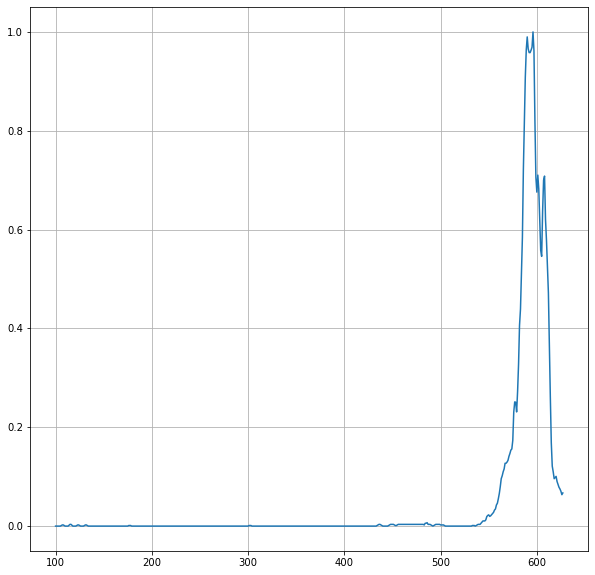

In [290]:
plt.figure(figsize=(10, 10))
plt.plot(data_blue['Total_f'])
#plt.plot(np.arange(data_blue['Total'].values.size), gauss(np.arange(data_blue['Total'].values.size), mu_blue, sigma_blue))
plt.grid()
plt.show()

In [291]:
data_red = pd.read_csv('Calibration (bad)/redrecaleb.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))[100:]
data_red['Total'] = (np.sqrt(data_red['Red'].values) + np.sqrt(data_red['Green'].values) + np.sqrt(data_red['Blue'].values)) ** 2 

data_red['Total'] /= np.max(data_red['Total'])

n = 3  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_red['Total_f'] = lfilter(b, a, data_red['Total'])
data_red['Total_f'] /= np.max(data_red['Total_f'])
data_red.head()

,Red,Green,Blue,Total,Total_f
100,0,0,0,0.000000,0.000000
101,0,2,0,0.005016,0.002035
102,0,0,0,0.000000,0.002035
103,0,0,0,0.000000,0.002035
104,0,0,0,0.000000,0.000000


In [292]:
RED_PEAK = np.argmax(data_red['Total_f'])
RED_WAVE = 635
RED_PEAK

152

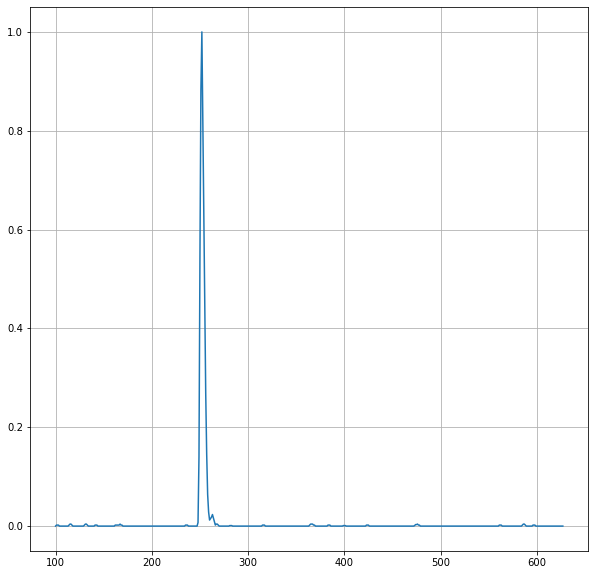

In [293]:
plt.figure(figsize=(10, 10))
plt.plot(data_red['Total_f'])
#plt.plot(np.arange(data_blue['Total'].values.size), gauss(np.arange(data_blue['Total'].values.size), mu_blue, sigma_blue))
plt.grid()
plt.show()

## Normal graphics

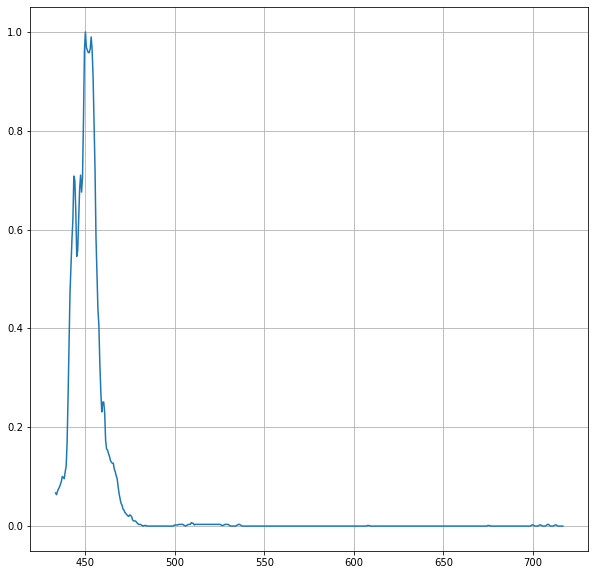

In [294]:
plt.figure(figsize=(10, 10))
plt.plot(x, data_blue['Total_f'])
#plt.plot(np.arange(data_blue['Total'].values.size), gauss(np.arange(data_blue['Total'].values.size), mu_blue, sigma_blue))
plt.grid()
plt.show()

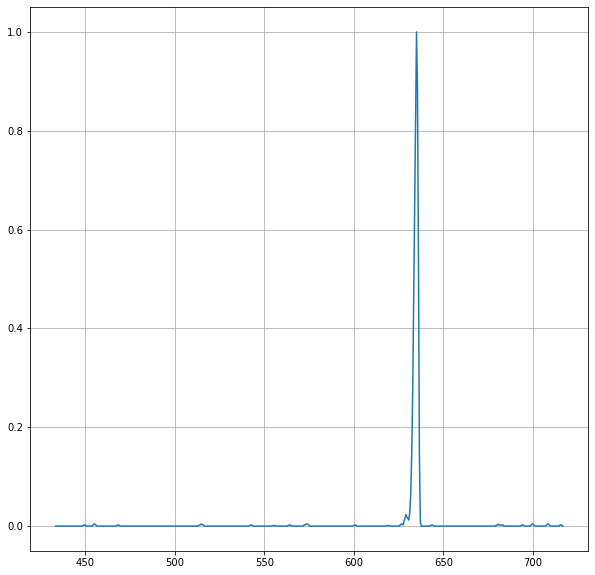

In [295]:
plt.figure(figsize=(10, 10))
plt.plot(x, data_red['Total_f'])
#plt.plot(np.arange(data_blue['Total'].values.size), gauss(np.arange(data_blue['Total'].values.size), mu_blue, sigma_blue))
plt.grid()
plt.show()

## Ditches

In [296]:
data_clear = pd.read_csv('Ditches/c_no_water.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))[100:]
data_clear['Total'] = (np.sqrt(data_clear['Red'].values) + np.sqrt(data_clear['Green'].values) + np.sqrt(data_clear['Blue'].values)) ** 2 

data_clear['Total'] /= np.max(data_clear['Total'])

n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_clear['Total_f'] = lfilter(b, a, data_clear['Total'])
data_clear['Total_f'] /= np.max(data_clear['Total_f'])
CLEAR = data_clear['Total_f']
data_clear.head()

,Red,Green,Blue,Total,Total_f
100,12,0,0,0.013354,0.000702
101,9,0,0,0.010015,0.001228
102,12,0,0,0.013354,0.001930
103,12,0,0,0.013354,0.002632
104,9,0,0,0.010015,0.003159


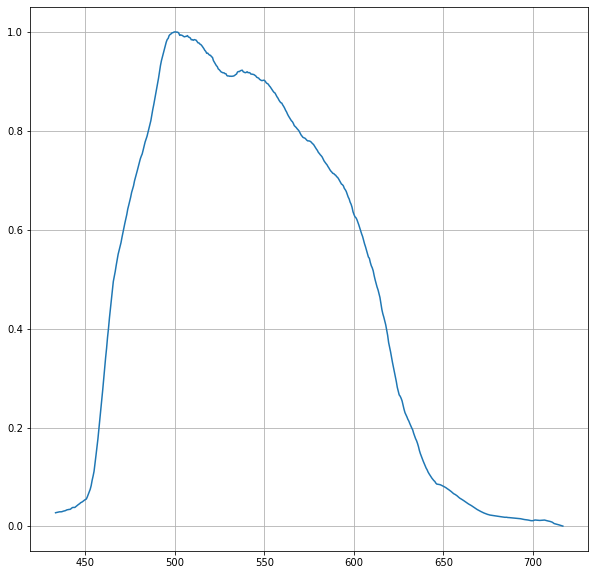

In [297]:
plt.figure(figsize=(10, 10))
plt.plot(x, data_clear['Total_f'])
#plt.plot(np.arange(data_blue['Total'].values.size), gauss(np.arange(data_blue['Total'].values.size), mu_blue, sigma_blue))
plt.grid()
plt.show()

In [298]:
data_cocl3 = pd.read_csv('Ditches/c_cocl3.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))[100:]
data_cocl3['Total'] = (np.sqrt(data_cocl3['Red'].values) + np.sqrt(data_cocl3['Green'].values) + np.sqrt(data_cocl3['Blue'].values)) ** 2 

data_cocl3['Total'] /= np.max(data_cocl3['Total'])

n = 10  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_cocl3['Total_f'] = lfilter(b, a, data_cocl3['Total'])
data_cocl3['Total_f'] /= np.max(data_cocl3['Total_f'])

data_cocl3.head()

,Red,Green,Blue,Total,Total_f
100,19,0,0,0.023470,0.002444
101,19,0,0,0.023470,0.004889
102,20,0,0,0.024706,0.007462
103,20,0,0,0.024706,0.010035
104,23,0,0,0.028412,0.012994


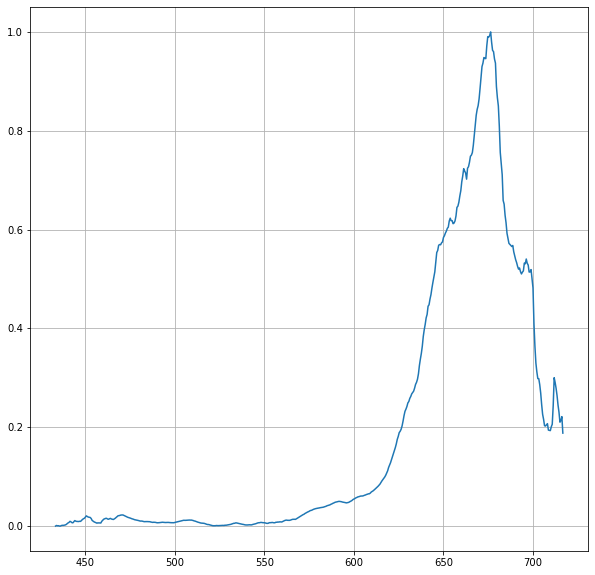

In [299]:
plt.figure(figsize=(10, 10))
a = data_cocl3['Total_f'] / CLEAR
a = np.interp(a, (a.min(), a.max()), (0, +1))
plt.plot(x, a)
plt.grid()
plt.show()

In [300]:
data_feso4 = pd.read_csv('Ditches/c_blue.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))[100:]
data_feso4['Total'] = (np.sqrt(data_feso4['Red'].values) + np.sqrt(data_feso4['Green'].values) + np.sqrt(data_feso4['Blue'].values)) ** 2 

data_feso4['Total'] /= np.max(data_feso4['Total'])

n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_feso4['Total_f'] = lfilter(b, a, data_feso4['Total'])
data_feso4['Total_f'] /= np.max(data_feso4['Total_f'])

data_feso4.head()

,Red,Green,Blue,Total,Total_f
100,12,0,0,0.012852,0.000673
101,12,0,2,0.025488,0.002008
102,9,0,6,0.031806,0.003674
103,9,0,6,0.031806,0.005340
104,12,0,0,0.012852,0.006013


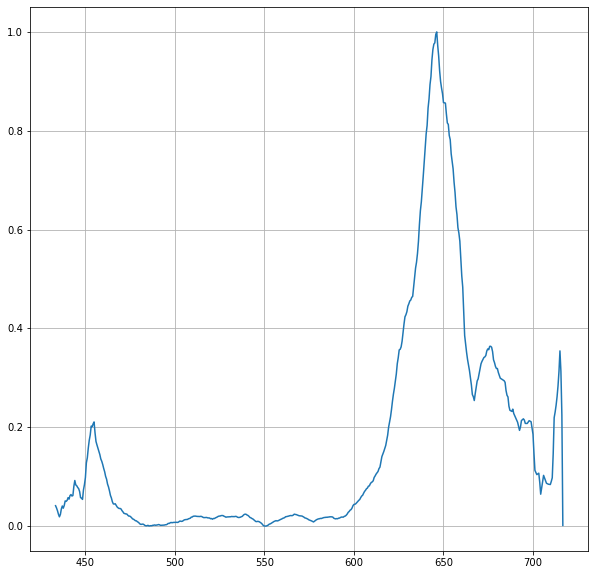

In [301]:
plt.figure(figsize=(10, 10))
a = data_feso4['Total_f'] / CLEAR
a = np.interp(a, (a.min(), a.max()), (0, +1))
plt.plot(x, a)
#plt.plot(np.arange(data_blue['Total'].values.size), gauss(np.arange(data_blue['Total'].values.size), mu_blue, sigma_blue))
plt.grid()
plt.show()